In [1]:
#import required modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

%matplotlib inline

In [2]:
#load dataset
df_train = pd.read_csv('train.csv',header=None)
df_test = pd.read_csv('test.csv',header=None)

In [3]:
#check structure of data in dataframe
df_train.head()

,0,1,2,3,4,5,6,7,8
0,ID_1,-64,-56,-61,-66,-71,-82,-81,1
1,ID_2,-68,-57,-61,-65,-71,-85,-85,1
2,ID_3,-63,-60,-60,-67,-76,-85,-84,1
3,ID_4,-61,-60,-68,-62,-77,-90,-80,1
4,ID_5,-63,-65,-60,-63,-77,-81,-87,1


In [4]:
#get basic relevant information about the data
#also to check if data contains NaN values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
0    1500 non-null object
1    1500 non-null int64
2    1500 non-null int64
3    1500 non-null int64
4    1500 non-null int64
5    1500 non-null int64
6    1500 non-null int64
7    1500 non-null int64
8    1500 non-null int64
dtypes: int64(8), object(1)
memory usage: 105.5+ KB


In [5]:
df_test.head()

,0,1,2,3,4,5,6,7
0,ID_1,-62,-51,-54,-60,-74,-74,-82
1,ID_2,-57,-54,-51,-60,-47,-84,-88
2,ID_3,-56,-55,-44,-60,-51,-84,-86
3,ID_4,-19,-60,-54,-35,-69,-69,-78
4,ID_5,-67,-56,-60,-66,-73,-93,-87


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
0    500 non-null object
1    500 non-null int64
2    500 non-null int64
3    500 non-null int64
4    500 non-null int64
5    500 non-null int64
6    500 non-null int64
7    500 non-null int64
dtypes: int64(7), object(1)
memory usage: 31.3+ KB


In [7]:
colors=[]
for i in df_train[8]:
    if i==1:
        colors.append('red')
    elif i==2:
        colors.append('blue')
    elif i==3:
        colors.append('green')
    else:
        colors.append('yellow')

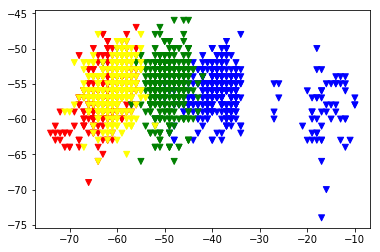

In [8]:
#visualize the relationship between attributes and output
plt.scatter(df_train[1],df_train[2],c=colors,marker='v')

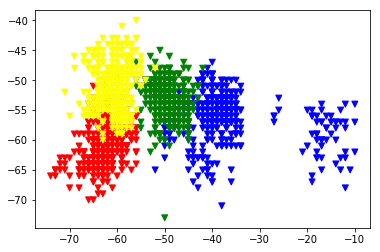

In [9]:
plt.scatter(df_train[1],df_train[3],c=colors,marker='v')

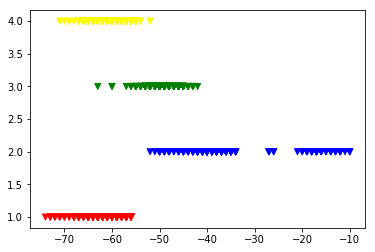

In [10]:
plt.scatter(df_train[1],df_train[8],c=colors,marker='v')

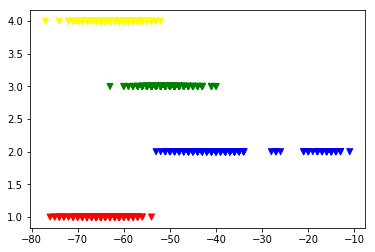

In [11]:
plt.scatter(df_train[4],df_train[8],c=colors,marker='v')

In [12]:
#check the correlation between attributes
df_train.corr()

,1,2,3,4,5,6,7,8
1,1.000000,-0.025001,0.008173,0.923140,-0.264992,0.719425,0.681010,-0.084136
2,-0.025001,1.000000,0.266312,-0.015241,0.171894,0.064655,0.037988,0.116089
3,0.008173,0.266312,1.000000,0.047409,0.598848,-0.106953,-0.090573,0.663055
4,0.923140,-0.015241,0.047409,1.000000,-0.251789,0.701984,0.667914,-0.051578
5,-0.264992,0.171894,0.598848,-0.251789,1.000000,-0.424032,-0.366804,0.813521
6,0.719425,0.064655,-0.106953,0.701984,-0.424032,1.000000,0.726351,-0.368125
7,0.681010,0.037988,-0.090573,0.667914,-0.366804,0.726351,1.000000,-0.315843
8,-0.084136,0.116089,0.663055,-0.051578,0.813521,-0.368125,-0.315843,1.000000


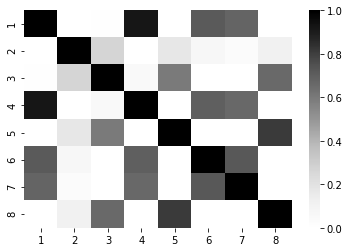

In [13]:
#visualize the correlation between attributes
sb.heatmap(df_train.corr(), vmin = 0, vmax = 1, cmap = 'Greys')

In [14]:
#creating required dataframes to train models
X = df_train[[1,2,3,4,5,6,7]]
Y = df_train[8]`
X_final = df_test[[1,2,3,4,5,6,7]]

In [15]:
#split the original data into train and test data (75:25 split)
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=.25,random_state=42)

In [16]:
#choose model to train data
gnb = GaussianNB()

In [17]:
#train the data with choosen model, no prior probabilities assigned
gnb.fit(X_train,Y_train)

GaussianNB(priors=None)

In [18]:
#predict the output of the model on the test data
p_gnb = gnb.predict(X_test)

In [19]:
#compare with actual output to get accuracy score
metrics.accuracy_score(Y_test,p_gnb)

0.98399999999999999

In [20]:
gnb_final = GaussianNB()

In [21]:
#train the model on the whole dataset
gnb_final.fit(X, Y)

GaussianNB(priors=None)

In [22]:
#predict the outputs for the actual test dataset
p_gnb_final = gnb_final.predict(X_final)

In [23]:
#create final dataframe of predicted values
sol = pd.DataFrame({'Id':df_test[0],'Category':pd.Series(p_gnb_final)},columns=['Id','Category'])
sol.head()

,Id,Category
0,ID_1,1
1,ID_2,4
2,ID_3,4
3,ID_4,2
4,ID_5,1


In [24]:
p_gnb_final

array([1, 4, 4, 2, 1, 3, 1, 4, 2, 2, 3, 4, 4, 2, 1, 3, 3, 3, 1, 3, 2, 3, 3,
       4, 2, 2, 4, 4, 2, 4, 3, 4, 2, 1, 3, 3, 2, 1, 1, 4, 3, 1, 1, 1, 4, 4,
       3, 3, 4, 3, 4, 1, 4, 1, 1, 1, 1, 2, 2, 1, 2, 4, 4, 3, 1, 4, 4, 1, 2,
       4, 1, 2, 2, 3, 4, 1, 3, 4, 3, 3, 3, 2, 2, 4, 2, 4, 4, 4, 2, 4, 4, 2,
       4, 4, 3, 3, 4, 1, 3, 1, 1, 1, 1, 3, 2, 2, 3, 4, 1, 3, 1, 2, 4, 2, 4,
       1, 4, 2, 3, 2, 4, 4, 2, 3, 2, 3, 3, 3, 2, 2, 3, 3, 4, 4, 3, 1, 4, 4,
       2, 4, 1, 4, 4, 4, 1, 1, 2, 1, 3, 3, 4, 3, 3, 3, 2, 4, 4, 4, 2, 1, 2,
       2, 2, 1, 2, 4, 1, 3, 4, 2, 2, 1, 2, 1, 3, 1, 2, 3, 2, 3, 4, 3, 3, 1,
       3, 1, 1, 4, 2, 3, 3, 1, 4, 4, 2, 2, 2, 4, 3, 4, 4, 3, 2, 3, 3, 1, 1,
       2, 1, 4, 4, 3, 2, 3, 2, 1, 1, 2, 1, 3, 3, 1, 4, 1, 2, 3, 1, 3, 2, 4,
       3, 3, 1, 4, 3, 3, 2, 4, 2, 1, 2, 2, 4, 1, 1, 4, 2, 3, 3, 1, 1, 3, 3,
       1, 2, 4, 4, 4, 4, 4, 3, 2, 3, 1, 3, 3, 1, 2, 2, 1, 4, 1, 1, 2, 3, 4,
       1, 1, 1, 2, 4, 4, 1, 3, 1, 3, 3, 1, 1, 3, 3, 3, 2, 1, 3, 4, 3, 2, 3,
       3, 1,

In [25]:
#convert final output dataframe to csv format
sol.to_csv('Answer.csv',index=False)